## RIPPLE COIN PRIZE PREDICTION

In [1]:
import pandas as pd
Ripple_data = pd.read_csv("RIPPLE_DATA.csv")
Ripple_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2018,2.296020,2.391030,2.148970,2.391030,2.391030,1894230016
1,02-01-2018,2.369480,2.489190,2.247930,2.480900,2.480900,3171010048
2,03-01-2018,2.464100,3.279380,2.443150,3.105370,3.105370,6635879936
3,04-01-2018,3.117340,3.841940,3.117340,3.196630,3.196630,8103660032
4,05-01-2018,3.300810,3.564680,2.825610,3.048710,3.048710,6288500224
...,...,...,...,...,...,...,...
2246,25-02-2024,0.545114,0.548400,0.542346,0.542425,0.542425,702442509
2247,26-02-2024,0.542436,0.552444,0.529233,0.551405,0.551405,1154518101
2248,27-02-2024,0.551405,0.596065,0.548170,0.586258,0.586258,2360919082
2249,28-02-2024,0.586252,0.605205,0.543688,0.575811,0.575811,3080912384


In [2]:
Data = Ripple_data.reset_index()["Close"]
Data.head()

0    2.39103
1    2.48090
2    3.10537
3    3.19663
4    3.04871
Name: Close, dtype: float64

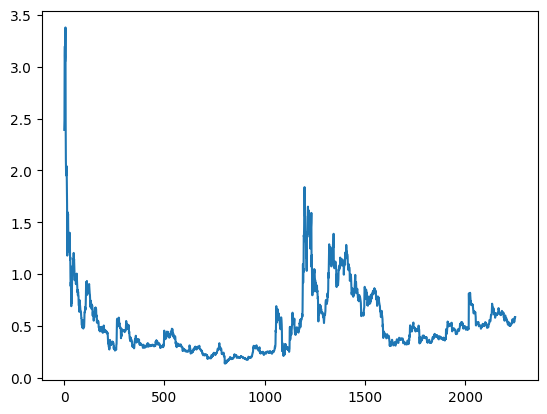

In [3]:
import matplotlib.pyplot as plt
plt.plot(Data)

In [4]:
import numpy as np
Data

0       2.391030
1       2.480900
2       3.105370
3       3.196630
4       3.048710
          ...   
2246    0.542425
2247    0.551405
2248    0.586258
2249    0.575811
2250    0.586325
Name: Close, Length: 2251, dtype: float64

In [5]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range = (0,1))
Data = scalar.fit_transform(np.array(Data).reshape(-1,1))
print(Data)

[[0.69526662]
 [0.72301991]
 [0.91586619]
 ...
 [0.13792429]
 [0.13469809]
 [0.13794498]]


In [6]:
training_size = int(len(Data)*0.75)
test_size = len(Data)-training_size
train_data, test_data = Data[0:training_size,:], Data[training_size:len(Data),:1]
training_size, test_size

(1688, 563)

In [7]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return numpy.array(dataX), numpy.array(dataY) 

In [8]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [9]:
print(X_train.shape), print(Y_train.shape)

(1587, 100)
(1587,)


(None, None)

In [10]:
print(X_test.shape), print(Y_test.shape)

(462, 100)
(462,)


(None, None)

In [11]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [13]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

C:\Users\91636\Desktop\project\my_kernal\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=100,batch_size = 64, verbose = 1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0099 - val_loss: 3.9331e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0018 - val_loss: 2.3741e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0011 - val_loss: 2.8482e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 9.4871e-04 - val_loss: 1.8022e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 6.7089e-04 - val_loss: 1.8041e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 7.2336e-04 - val_loss: 1.6139e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 6.9308e-04 - val_loss: 1.4911e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 7.8873e-04 - val_loss: 1.7783e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 6.3600e-04 - val_loss: 2.2564e-04
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 6.5546e-04 - val_loss: 1.3604e-04
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 6.1287e-04

In [16]:
import tensorflow as tf
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [17]:
train_predict = scalar.inverse_transform(train_predict)
test_predict = scalar.inverse_transform(test_predict)

In [18]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))

0.4311806669501336

In [19]:
math.sqrt(mean_squared_error(Y_test, test_predict))

0.39305441808101493

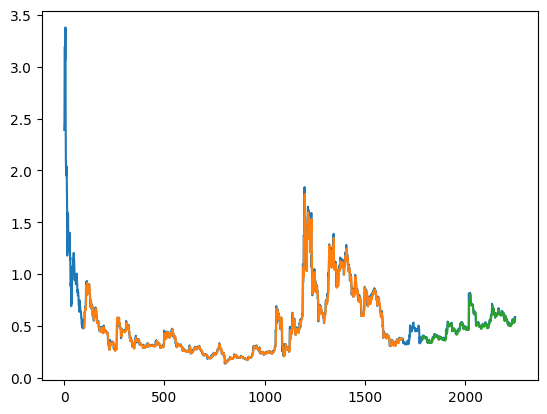

In [20]:
look_back = 100
trainPredictPlot = numpy.empty_like(Data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(Data)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Data)-1,:] = test_predict
plt.plot(scalar.inverse_transform(Data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [21]:
len(test_data)

563

In [22]:
x_input = test_data[463:].reshape(1,-1)
x_input.shape

(1, 100)

In [23]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [24]:
temp_input

[0.14584264284666515,
 0.1484190940884912,
 0.14892524338554897,
 0.14940792267249298,
 0.14736201718560607,
 0.1434505547106009,
 0.1456953376516093,
 0.14505794158746824,
 0.14413149381982132,
 0.1461563998239749,
 0.14864576497564214,
 0.14949408231488415,
 0.14969512148046352,
 0.14896106603256465,
 0.15462351478842248,
 0.15564229851691153,
 0.16475422112764135,
 0.16033074185304994,
 0.1611843090629753,
 0.14840952079489217,
 0.14820508465416476,
 0.15096497255398486,
 0.1521835601843631,
 0.14695221845638362,
 0.14829340600801377,
 0.14538528646537016,
 0.14603750569379356,
 0.14385294185768216,
 0.14751642514688054,
 0.1495518308924008,
 0.15001258424884387,
 0.1484076678993569,
 0.14634261582527194,
 0.15647764558740648,
 0.14907594555575282,
 0.15293212998062178,
 0.15297598184162373,
 0.14939495240374592,
 0.1489138171964146,
 0.14678206088305912,
 0.15145784276637303,
 0.15000054042786445,
 0.136788468813452,
 0.1385320435121635,
 0.13490654458143864,
 0.13244404641503316,


In [25]:
from numpy import array
lst_output = []
n_steps = 100
i = 0
while (i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(1,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape (1, n_steps, 1)
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}". format (i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
print(lst_output)

[0.1358498]
101
1 day input [0.14841909 0.14892524 0.14940792 0.14736202 0.14345055 0.14569534
 0.14505794 0.14413149 0.1461564  0.14864576 0.14949408 0.14969512
 0.14896107 0.15462351 0.1556423  0.16475422 0.16033074 0.16118431
 0.14840952 0.14820508 0.15096497 0.15218356 0.14695222 0.14829341
 0.14538529 0.14603751 0.14385294 0.14751643 0.14955183 0.15001258
 0.14840767 0.14634262 0.15647765 0.14907595 0.15293213 0.15297598
 0.14939495 0.14891382 0.14678206 0.15145784 0.15000054 0.13678847
 0.13853204 0.13490654 0.13244405 0.12726489 0.13535031 0.13186378
 0.14216465 0.14281501 0.1329959  0.13447173 0.13482841 0.13473175
 0.13474009 0.13227759 0.12731616 0.12495341 0.1276926  0.12552626
 0.11953678 0.11676392 0.11684143 0.1154882  0.12122693 0.12063122
 0.11872706 0.1221228  0.11459016 0.1122725  0.1130958  0.11450184
 0.11713511 0.11230184 0.1132147  0.11287778 0.11554471 0.11577324
 0.11932524 0.11873262 0.1193416  0.12113675 0.11895589 0.12314529
 0.13066619 0.13134713 0.12669204 

8 day output [[0.12565526]]
1 day input [0.1461564  0.14864576 0.14949408 0.14969512 0.14896107 0.15462351
 0.1556423  0.16475422 0.16033074 0.16118431 0.14840952 0.14820508
 0.15096497 0.15218356 0.14695222 0.14829341 0.14538529 0.14603751
 0.14385294 0.14751643 0.14955183 0.15001258 0.14840767 0.14634262
 0.15647765 0.14907595 0.15293213 0.15297598 0.14939495 0.14891382
 0.14678206 0.15145784 0.15000054 0.13678847 0.13853204 0.13490654
 0.13244405 0.12726489 0.13535031 0.13186378 0.14216465 0.14281501
 0.1329959  0.13447173 0.13482841 0.13473175 0.13474009 0.13227759
 0.12731616 0.12495341 0.1276926  0.12552626 0.11953678 0.11676392
 0.11684143 0.1154882  0.12122693 0.12063122 0.11872706 0.1221228
 0.11459016 0.1122725  0.1130958  0.11450184 0.11713511 0.11230184
 0.1132147  0.11287778 0.11554471 0.11577324 0.11932524 0.11873262
 0.1193416  0.12113675 0.11895589 0.12314529 0.13066619 0.13134713
 0.12669204 0.128859   0.1306174  0.13071777 0.12641967 0.12392134
 0.1219511  0.12521961 

17 day output [[0.11180253]]
1 day input [0.16118431 0.14840952 0.14820508 0.15096497 0.15218356 0.14695222
 0.14829341 0.14538529 0.14603751 0.14385294 0.14751643 0.14955183
 0.15001258 0.14840767 0.14634262 0.15647765 0.14907595 0.15293213
 0.15297598 0.14939495 0.14891382 0.14678206 0.15145784 0.15000054
 0.13678847 0.13853204 0.13490654 0.13244405 0.12726489 0.13535031
 0.13186378 0.14216465 0.14281501 0.1329959  0.13447173 0.13482841
 0.13473175 0.13474009 0.13227759 0.12731616 0.12495341 0.1276926
 0.12552626 0.11953678 0.11676392 0.11684143 0.1154882  0.12122693
 0.12063122 0.11872706 0.1221228  0.11459016 0.1122725  0.1130958
 0.11450184 0.11713511 0.11230184 0.1132147  0.11287778 0.11554471
 0.11577324 0.11932524 0.11873262 0.1193416  0.12113675 0.11895589
 0.12314529 0.13066619 0.13134713 0.12669204 0.128859   0.1306174
 0.13071777 0.12641967 0.12392134 0.1219511  0.12521961 0.12438797
 0.12716113 0.13792429 0.13469809 0.13794498 0.1358498  0.13504018
 0.13393602 0.13269794 0

27 day output [[0.09641001]]
1 day input [0.14751643 0.14955183 0.15001258 0.14840767 0.14634262 0.15647765
 0.14907595 0.15293213 0.15297598 0.14939495 0.14891382 0.14678206
 0.15145784 0.15000054 0.13678847 0.13853204 0.13490654 0.13244405
 0.12726489 0.13535031 0.13186378 0.14216465 0.14281501 0.1329959
 0.13447173 0.13482841 0.13473175 0.13474009 0.13227759 0.12731616
 0.12495341 0.1276926  0.12552626 0.11953678 0.11676392 0.11684143
 0.1154882  0.12122693 0.12063122 0.11872706 0.1221228  0.11459016
 0.1122725  0.1130958  0.11450184 0.11713511 0.11230184 0.1132147
 0.11287778 0.11554471 0.11577324 0.11932524 0.11873262 0.1193416
 0.12113675 0.11895589 0.12314529 0.13066619 0.13134713 0.12669204
 0.128859   0.1306174  0.13071777 0.12641967 0.12392134 0.1219511
 0.12521961 0.12438797 0.12716113 0.13792429 0.13469809 0.13794498
 0.1358498  0.13504018 0.13393602 0.13269794 0.13137893 0.13000385
 0.12858628 0.12713468 0.12565526 0.12415335 0.12263392 0.12110139
 0.11955968 0.11801199 0.

In [26]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)
print(day_pred)

[101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130]


In [27]:
import matplotlib.pyplot as plt
len(Data)

2251

In [28]:
df3 = Data.tolist()
df3.extend(lst_output)

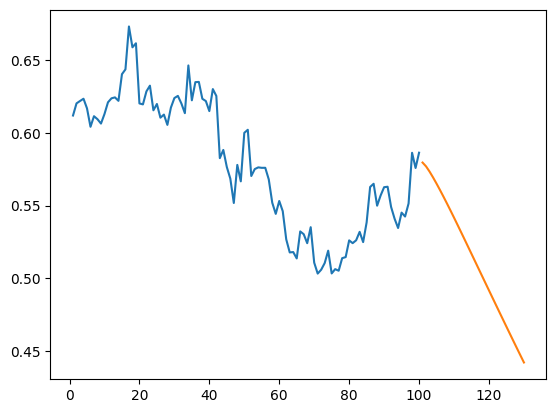

In [29]:
plt.plot(day_new,scalar.inverse_transform(Data[2151:]))
plt.plot(day_pred,scalar.inverse_transform(lst_output))

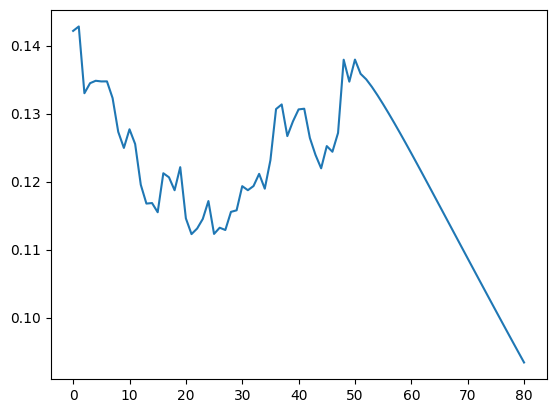

In [30]:
df3=Data.tolist()
df3.extend(lst_output)
plt.plot(df3[2200:])

In [31]:
df3=scalar.inverse_transform(df3).tolist()

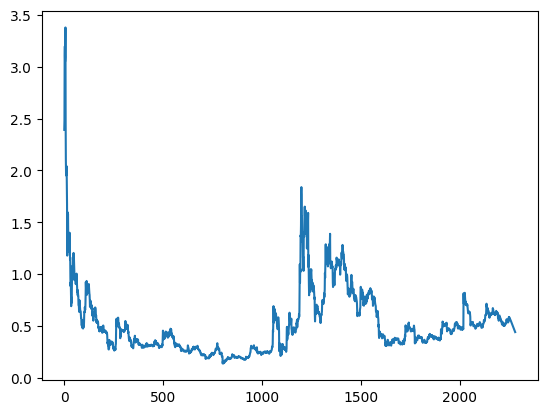

In [32]:
plt.plot(df3)